In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import os

In [4]:
from tensorflow.keras import models, layers

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
from tensorflow.keras.preprocessing import image

In [7]:
from tensorflow.keras.preprocessing.image import img_to_array

In [9]:
import matplotlib.pyplot as plt

In [10]:
from tensorflow.keras import backend as K

In [11]:
IMAGE_SIZE= 256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=30

In [12]:
dataset=tf.keras.utils.image_dataset_from_directory(
    "PlantVillage",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
)

Found 2152 files belonging to 3 classes.


In [13]:
class_names= dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [14]:
len(dataset)

68

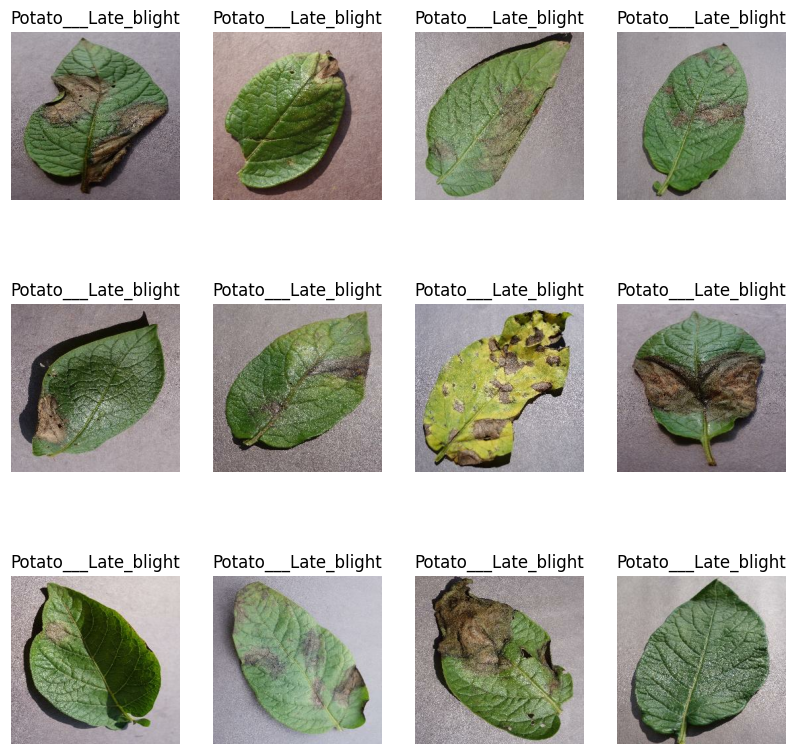

In [15]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        plt.axis("off")

In [16]:
len(dataset)

68

In [18]:
tarin_size=0.8
train_ds=dataset.take(54)
len(train_ds)

54

In [19]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [20]:
val_size=0.1
val_ds=test_ds.take(6)
len(val_ds)

6

In [21]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [22]:
def get_dataset_patotions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [23]:
train_ds, val_ds, test_ds= get_dataset_patotions_tf(dataset)

In [24]:
len(train_ds)

54

In [25]:
len(val_ds)

6

In [26]:
len(test_ds)

8

In [27]:
#prefetch and catche concept
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [30]:


resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [34]:



data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [36]:

input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    
    layers.Dense(64, activation='relu'),
    
    layers.Dense(n_classes, activation='softmax')
])


model.build(input_shape=input_shape)

s:\Download\potato-disease\my_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    #in each epos what type of matrix?
    metrics=['accuracy']
)

In [39]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 716ms/step - accuracy: 0.4732 - loss: 0.9323 - val_accuracy: 0.6771 - val_loss: 0.6783
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 695ms/step - accuracy: 0.6371 - loss: 0.7298 - val_accuracy: 0.7500 - val_loss: 0.5999
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 699ms/step - accuracy: 0.7390 - loss: 0.5537 - val_accuracy: 0.8281 - val_loss: 0.3800
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 701ms/step - accuracy: 0.8312 - loss: 0.3886 - val_accuracy: 0.8542 - val_loss: 0.3543
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 750ms/step - accuracy: 0.8756 - loss: 0.3104 - val_accuracy: 0.8958 - val_loss: 0.2112
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 718ms/step - accuracy: 0.9235 - loss: 0.2124 - val_accuracy: 0.9479 - val_loss: 0.1112
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 691ms/step - accuracy: 0.9222 - loss: 0.1958 - val_accuracy: 0.9740 - val_loss: 0.0927
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 696ms/step - accuracy: 0.9569 - loss: 0.1184 - val_accu

In [40]:
scores= model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.9864 - loss: 0.0525


In [41]:
scores
#loss, accouracy

[0.054242804646492004, 0.984375]

In [42]:
history

In [43]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [44]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [45]:
history.history['accuracy']

[0.4947916567325592,
 0.6915509104728699,
 0.7719907164573669,
 0.8454861044883728,
 0.8912037014961243,
 0.9160879850387573,
 0.9259259104728699,
 0.9508101940155029,
 0.9207175970077515,
 0.9641203880310059,
 0.9652777910232544,
 0.9710648059844971,
 0.9739583134651184,
 0.9820601940155029,
 0.9826388955116272,
 0.9675925970077515,
 0.9658564925193787,
 0.9849537014961243,
 0.9901620149612427,
 0.9872685074806213,
 0.9809027910232544,
 0.9890046119689941,
 0.9918981194496155,
 0.9965277910232544,
 0.9855324029922485,
 0.9756944179534912,
 0.9913194179534912,
 0.9826388955116272,
 0.9699074029922485,
 0.9913194179534912]

In [46]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and validation error')

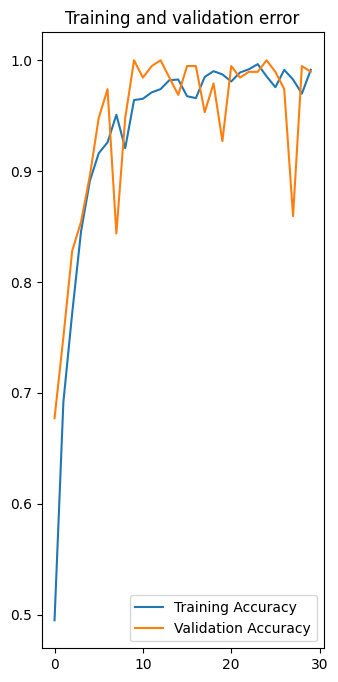

In [47]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation error')

first image predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
Potato___Late_blight


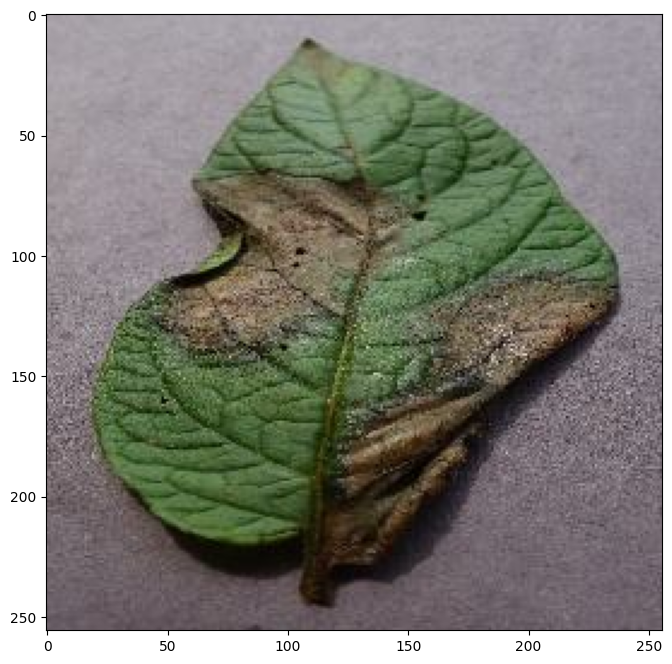

In [48]:
plt.figure(figsize=(8,8))
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print("first image predict")
    plt.imshow(first_image)
    print('actual label:',class_names[first_label])
    
    batch_prediction=model.predict(image_batch)
    print(class_names[np.argmax(batch_prediction[0])])

In [49]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array, 0)
    
    predictions=model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence=round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


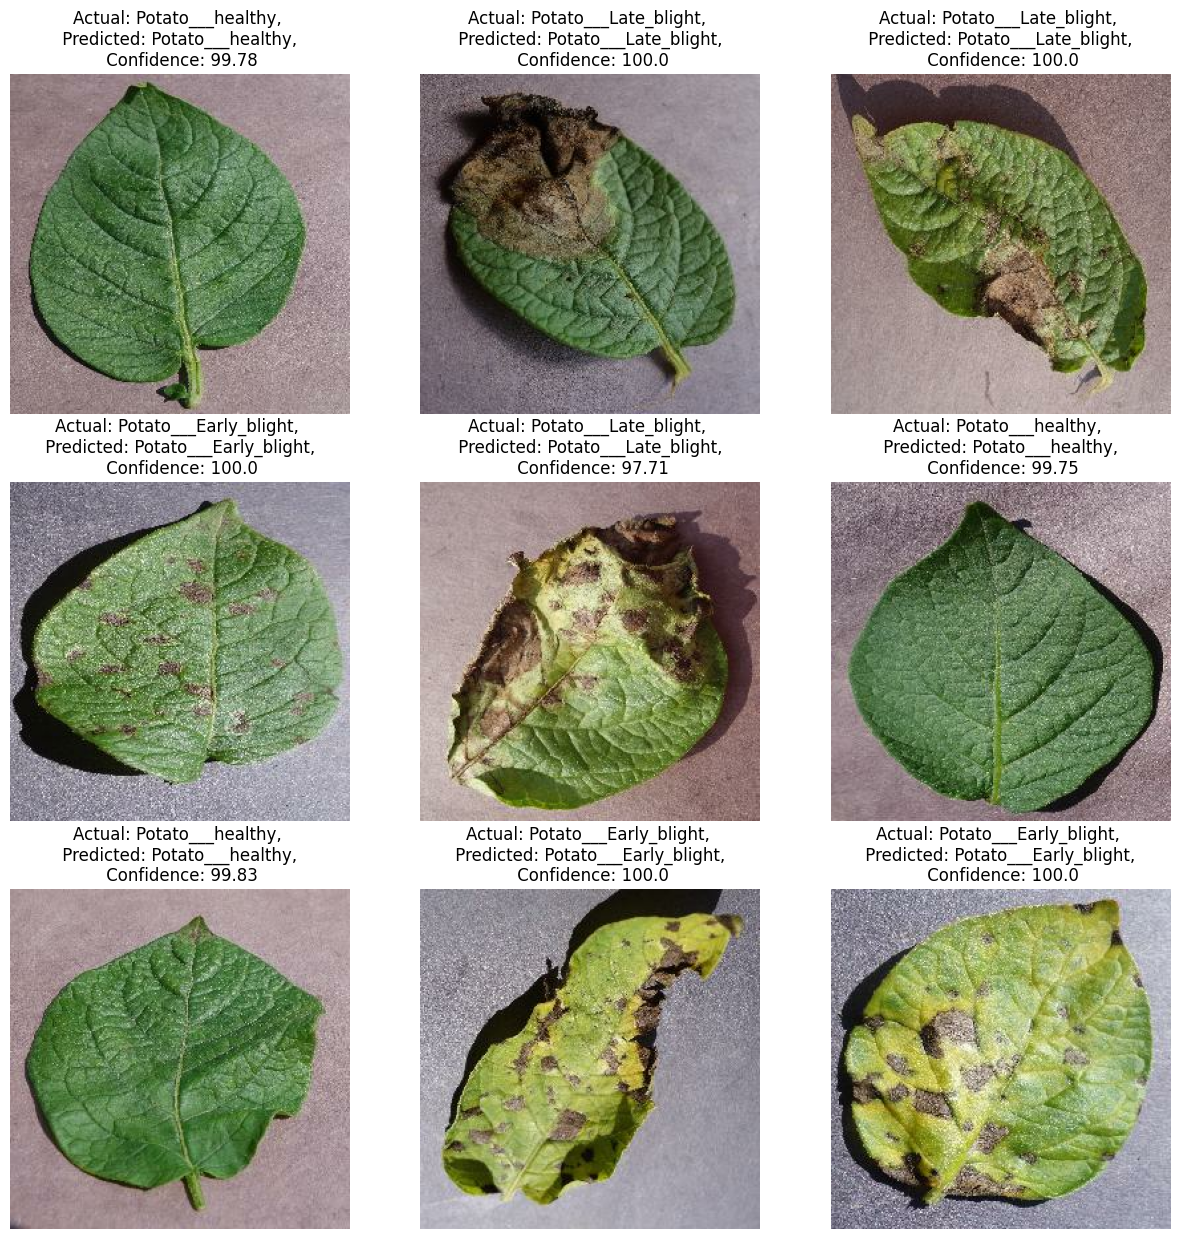

In [50]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}")
        plt.axis("off")

In [2]:
model.save("../saved_models/my_model.keras")

NameError: name 'model' is not defined

In [ ]:
import os
model_version = max([int(i) for i in os.listdir("../saved_models") + [0]]) + 1
model.save(f"../saved_models/{model_version}")